# Image Denoising with Autoencoders

## Task 1: Introduction and Importing Libraries



In [1]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing


In [25]:
(x_train,y_train),(x_test , y_test) = mnist.load_data() #numpy arrays
#for normalization
x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.
x_train = np.reshape(x_train,(60000,784)) #784=28*28
x_test = np.reshape(x_test,(10000,784))

## Task 3: Adding Noise


In [26]:
x_train_noisy = x_train +np.random.rand(60000,784)*1
x_test_noisy = x_test +np.random.rand(10000,784)*1
x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

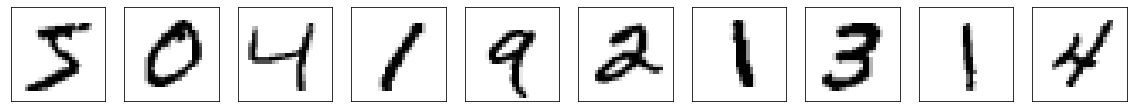

In [27]:
def plot(x,p,labels=False):   #p=prediction
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(28,28), cmap= 'binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    
plot(x_train,None)


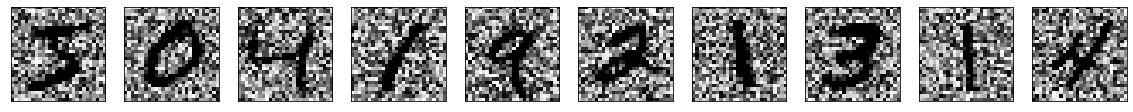

In [28]:

plot(x_train_noisy,None)

## Task 4: Building and Training a Classifier


In [35]:
classifier = Sequential([
    Dense(256,activation='relu',input_shape=(784,)),
    Dense(256,activation='relu'),
    Dense(10,activation='softmax')
])
classifier.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #lebels are not encorded,these are just numeric values
    metrics=['accuracy']
)

classifier.fit(x_train,y_train,batch_size=512,epochs =3)

Epoch 1/3
118/118 [==============================] - 6s 36ms/step - loss: 0.4101 - accuracy: 0.8876
Epoch 2/3
118/118 [==============================] - 5s 38ms/step - loss: 0.1598 - accuracy: 0.9537
Epoch 3/3
118/118 [==============================] - 3s 23ms/step - loss: 0.1072 - accuracy: 0.9685 1s - loss: 0.1 - ETA: 0s - loss: 0.109


In [41]:
loss,acc=classifier.evaluate(x_test,y_test)
print(acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1008 - accuracy: 0.9697
0.9696999788284302


In [42]:
loss,acc=classifier.evaluate(x_test_noisy,y_test)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 9.7534 - accuracy: 0.1511
0.15109999477863312


## Task 5: Building the Autoencoder


In [48]:
input_image = Input(shape=(784,))
encoded=Dense(64, activation='relu')(input_image)

decoded=Dense(784,activation='sigmoid')(encoded)

autoencoder=Model(input_image,decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')



## Task 6: Training the Autoencoder

In [57]:
autoencoder.fit(
    x_train_noisy,x_train,epochs=100,
    batch_size=512,validation_split = 0.2,verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        LambdaCallback(on_epoch_end=lambda e, l: print('{:,.3f}'.format(l['val_loss']), end='_'))
    
    ]
)



print('__')
print('Traing is complete')

0.132_0.129_0.127_0.126_0.124_0.123_0.122_0.121_0.120_0.119_0.119_0.118_0.117_0.117_0.117_0.116_0.116_0.115_0.115_0.115_0.114_0.114_0.114_0.114_0.114_0.114_0.114_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.113_0.112_0.113_0.112_0.112_0.112_0.112_0.113_0.113_0.112_0.112_0.112_0.112_0.113_0.112___
Traing is complete


## Task 7: Denoised Images


In [58]:
predictions = autoencoder.predict(x_test_noisy)

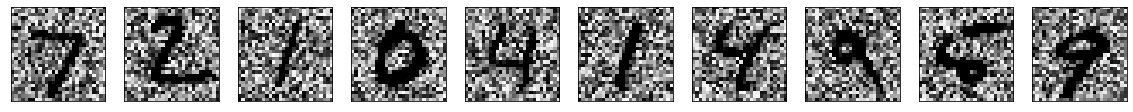

In [59]:
plot(x_test_noisy,None)

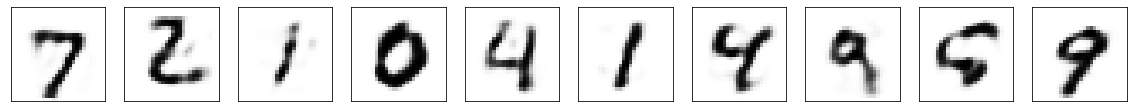

In [61]:
plot(predictions,None)

In [63]:
loss , acc =classifier.evaluate(predictions,y_test)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1847 - accuracy: 0.9429
0.9429000020027161


## Task 8: Composite Model


In [64]:
input_image=Input(shape=(784,))
x=autoencoder(input_image)
y=classifier(x)


denoise_and_classify = Model(input_image , y)

In [65]:
predictions = denoise_and_classify.predict(x_test_noisy)

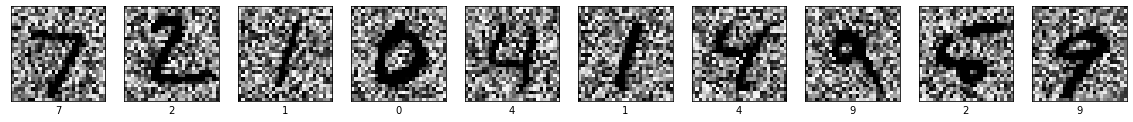

In [66]:
plot(x_test_noisy,predictions,True)

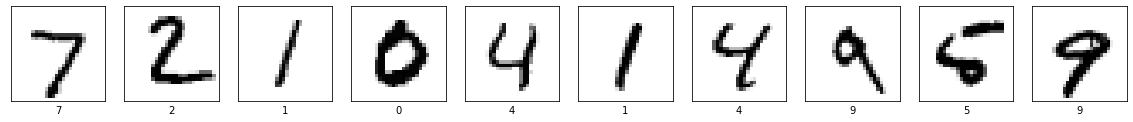

In [68]:
plot(x_test,to_categorical(y_test),True)